# **1. 규제 선형 회귀 모델/ 회귀 트리**
- 릿지 회귀모델 및 회귀 트리를 이용하여 전복의 나이를 예측해 보세요.

- 전복의 ‘성별’, ‘키’, ‘지름’, ‘높이’, ‘전체무게’, ‘몸통무게’, ‘내장무게’, ‘껍질무게’를 이용해 ‘껍질의 고리수’를 예측한 뒤, **예측된 ‘껍질의 고리수’에 1.5를 더하면 전복의 나이**가 됩니다.

In [38]:
# 기본 모듈 불러오기
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings(action='ignore')

### 1) 데이터 불러오기 및 데이터 선택

In [39]:
# 데이터 로드
data = pd.read_csv("abalone.csv")

# 성별 M은 Male, F는 Female, I는 Infant 이므로 따로 열 만들기
for label in "MFI":
    data[label] = data["Sex"] == label
data.drop('Sex', axis=1, inplace=True)

# X,y 데이터 선택
y = data.Rings.values
data.drop('Rings', axis=1, inplace=True)

X = data.values.astype(float)

## 2) train/test 분리
: 테스트 셋과 데이터 셋을 7:3 비율로 분리하세요.

In [40]:
# 필요한 모듈 불러오기
from sklearn.model_selection import train_test_split

In [41]:
# train과 test set 분리 (train:test = 7:3 비율로)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

## 3) 릿지 모델을 이용한 모델링
: 릿지 모델을 이용하여 전복의 나이를 예측해 보고 결과를 평가해 보세요.

 3-1) 릿지모델 생성, 교차검증, 평가에 필요한 모듈을 불러오세요.

In [42]:
#필요한 모듈 불러오기
from sklearn.linear_model import Ridge

3-2) 릿지 모델을 생성하고 훈련하여 MSE와 RMSE를 구하세요. 릿지 모델 생성 시  alpha는 0.3으로 설정합니다. (교차 검증 하지 않습니다.)

In [43]:
#릿지모델 생성 및 훈련
ridge_model = Ridge(alpha = 0.3)
ridge_model.fit(X_train, y_train)

#예측값 구하기
ridge_pred = ridge_model.predict(X_test)

#구한 예측값을 활용해 최종적으로 전복의 나이 예측
ridge_age_pred = ridge_pred*1.5

#MSE와 RMSE구하기
from sklearn.metrics import mean_squared_error
print('ridge 모델 mse : ', mean_squared_error(y_test*1.5, ridge_age_pred))
print('ridge 모델 rmse : ', np.sqrt(mean_squared_error(y_test*1.5, ridge_age_pred)))

ridge 모델 mse :  10.47702109012791
ridge 모델 rmse :  3.236822684381693


3-3) 교차검증을 이용하여 0, 0.1, 1, 10, 100 중  모델 성능이 가장 좋게 나오는 (rmse가 최소가 되는) alpha를 구하세요.

In [44]:
# 주어진 alpha
alphas=[0, 0.1, 1, 10, 100]

In [45]:
#alphas list 값을 반복하면서 alpha에 따른 평균 rmse를 구함
from sklearn.model_selection import cross_val_score
for alpha in alphas:
  ridge = Ridge(alpha=alpha)
  # cross_val_score를 이용해 5 폴드의 평균 RMSE를 계산
  neg_mse_scores = cross_val_score(ridge, X,y, scoring='neg_mean_squared_error', cv=5)
  avg_rmse = np.mean(np.sqrt(-1*neg_mse_scores))
  print('alpha {0} 일 때 5 folds의 평균 RMSE: {1:.3f}'.format(alpha,avg_rmse))

alpha 0 일 때 5 folds의 평균 RMSE: 2.240
alpha 0.1 일 때 5 folds의 평균 RMSE: 2.237
alpha 1 일 때 5 folds의 평균 RMSE: 2.230
alpha 10 일 때 5 folds의 평균 RMSE: 2.337
alpha 100 일 때 5 folds의 평균 RMSE: 2.621


alpha = 0.1

## 4) XGBRegressor을 이용한 모델링
: XGBRegressor 모델을 이용하여 전복의 나이를 예측해 보고 결과를 평가해 보세요.

4-1) XGBRegressor 훈련, 평가에 필요한 모듈을 불러오세요.

In [46]:
# 필요한 모듈 임포트
from xgboost import XGBRegressor

4-2) XGBregressor 모델을 생성하고 훈련하여 MSE와 RMSE를 구하세요.

In [47]:
#모델 생성 및 훈련
xgb_reg=XGBRegressor(n_estimators=100)
xgb_reg.fit(X_train, y_train)

#예측값 구하기
y_preds=xgb_reg.predict(X_test)

#MSE와 RMSE 구하기
mse=mean_squared_error(y_test, y_preds)
rmse=np.sqrt(mse)

print('MSE:{0:.3f}, RMSE:{1:.3f}'.format(mse, rmse))

MSE:4.842, RMSE:2.200


4-3) 생성한 모델의 피처 중요도를 시각화해보세요.

<Axes: >

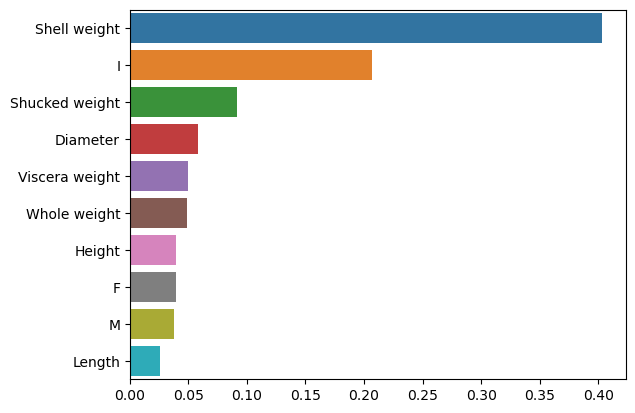

In [49]:
import seaborn as sns
%matplotlib inline

feature_series=pd.Series(data=xgb_reg.feature_importances_, index=data.columns)
feature_series=feature_series.sort_values(ascending=False)
sns.barplot(x=feature_series, y=feature_series.index)

---

# **2. 로지스틱 회귀분석**
load_wine() 함수를 이용하여 와인 데이터를 다항분류하는 로지스틱 회귀모델을 생성하세요.

In [ ]:
# 필요한 모듈 불러오기
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

## 1) 데이터 불러오기 및 변수 선택

In [ ]:
wine = load_wine()

wine_x = wine.data # x변수
wine_y = wine.target # y변수

## 2) train/test 셋 분리

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(wine_x, wine_y, test_size=0.3, random_state=123)

x_train.shape
y_train.shape

## 3) 로지스틱 회귀모델을 이용한 모델링

3-1) 로지스틱 회귀모델을 생성하여 훈련하세요.

In [ ]:
logistic_reg = LogisticRegression()
logistic_reg.fit(x_train, y_train)

3-2) 회귀 모델의 기울기와 절편을 구하세요.

In [ ]:
#기울기
logistic_reg.coef_

In [ ]:
#절편
logistic_reg.intercept_

3-3) 모델의 정확도를 구하세요.

In [ ]:
from sklearn.metrics import accuracy_score
#모델의 예측값 구하기
logistic_pred = logistic_reg.predict(x_test)

#모델의 정확도 구하기
print('accuracy: {:0.3f}'.format(accuracy_score(y_test, logistic_pred)))
